In [ ]:
!pip install -q git+https://github.com/huggingface/transformers@v4.49.0-Gemma-3

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:

from huggingface_hub import login
from google.colab import userdata

# Retrieve the token from Colab's Secret Manager
HF_TOKEN = userdata.get('HF_TOKEN')

# Log in to Hugging Face using the token
if HF_TOKEN:
    login(HF_TOKEN)
    print("Successfully logged in to Hugging Face!")
else:
    print("Token is not set.")

Successfully logged in to Hugging Face!


In [ ]:
import torch
from transformers import AutoProcessor, Gemma3ForConditionalGeneration

ckpt = "google/gemma-3-4b-it"
model = Gemma3ForConditionalGeneration.from_pretrained(
    ckpt, device_map="auto", torch_dtype=torch.bfloat16,
)
processor = AutoProcessor.from_pretrained(ckpt)


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [ ]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image from your local machine
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))  # Get the first uploaded file


Saving 1.jpg to 1.jpg


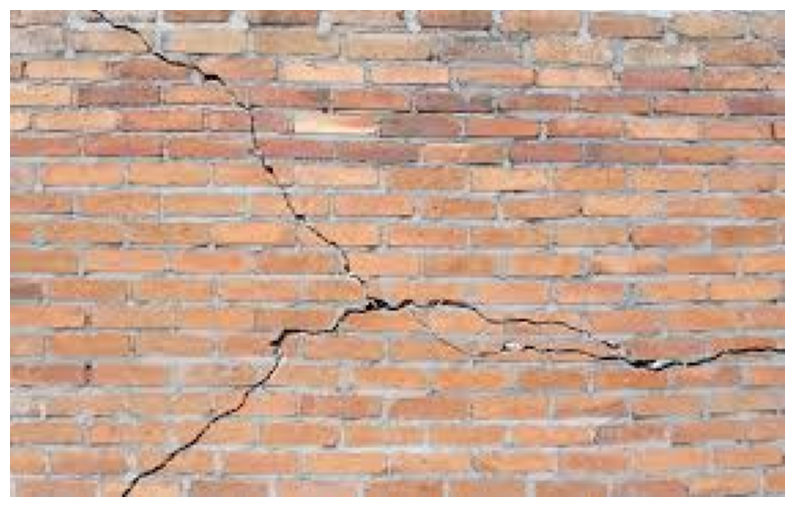

In [ ]:

# Load and display the uploaded image
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:

# Create chat messages with the image
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "What is in this image? Please describe it in detail."}
        ]
    }
]

# Process the messages with the chat template
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(model.device)

# Track the input length to extract only the new tokens later
input_len = inputs["input_ids"].shape[-1]

# Generate a response
with torch.inference_mode():
    generation = model.generate(
        **inputs,
        max_new_tokens=256,
        do_sample=False
    )
    # Extract only the newly generated tokens
    generation = generation[0][input_len:]

# Decode and print the response
response = processor.decode(generation, skip_special_tokens=True)
print("\nGemma 3's response:")
print(response)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:634: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:651: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `64` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(



Gemma 3's response:
Okay, let's describe the image!

**Here's a detailed description of the image:**

The image shows a close-up of a brick wall. 

**Key Features:**

*   **Material:** The wall is constructed of red-orange bricks. They appear to be a mix of different shades, giving the wall a slightly weathered and aged look.
*   **Texture:** The bricks have a rough, textured surface, typical of brickwork.
*   **Cracks:** The most prominent feature is the presence of several cracks running across the wall. These cracks are dark and appear to be relatively deep, suggesting some structural movement or deterioration. One large, prominent crack dominates the center of the image.
*   **Arrangement:** The bricks are laid in a standard running bond pattern, where each brick overlaps the one below it.
*   **Lighting:** The lighting seems to be natural and fairly even, illuminating the wall and highlighting the texture of the bricks and the cracks.

**Overall Impression:**

The image conveys a